# Diabetes Prediction | Feature Engineering, EDA, and Modeling


In this notebook, we will develop a machine learning model that can predict whether Pima Indian Women in the dataset have diabetes or not.

Before modelling , we will make the exploratory data analysis and feature engineering for its dataset.

![](https://www.cdc.gov/diabetes/images/library/spotlights/diabetes-stats-report-724px.png?_=42420)

The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.

#### Variables:

> **Pregnancies** - Number of pregnancies

> **Glucose** - 2-hour plasma glucose concentration in the oral glucose tolerance test

> **BloodPressure** - Diastolic Blood Pressure

> **SkinThickness** - Thickness of Skin

> **Insulin**- 2-hour serum insulin

> **DiabetesPedigreeFunction** -

> **BMI** - Body Mass Index

> **Age** - Age

> **Outcome** - Diabetic ( 1 or 0 )

### Table of Contents

##### [1.Data Preprocessing](#data_preprocessing)
* [Importing Libraries](#importing_libraries)<br>
* [Reading in a dataset](#reading_in_a_dataset)<br>
* [Exploratory Data Analysis](#exploratory_data_analysis)<br>

##### [2.Feature Engineering](#develop_the_association_rule_learning)
* [Processing for Missing Values and Outliers](#processing_for_missing_values_and_outliers)
* [Creating New Feature Interactions](#creating_new_feature_interactions)

##### [3.Modeling](#modeling)
* [Processing Encoding & One-Hot Encoding](#processing_encoding_and_one_hot-encoding)
* [Standardization for Numerical Variables](#standardization_for_numerical_variables)
* [Create Modeling](#create_modeling)

##### [4.Summary](#summary)


##                           1.DATA PREPROCESSING                                     #
<a id="data_preprocessing"></a>

#### **1.1.Importing Libraries**
<a id="importing_libraries"></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-data-set/diabetes.csv


#### **1.2.Read the dataset**
<a id="read_the_dataset"></a>

In [ ]:
df = pd.read_csv("../input/diabetes-data-set/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **1.3.Exploratory Data Analysis**
<a id="exploratory_data_analysis"></a>

In [ ]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
--------------------     Data Shape     --------------------
(768, 9)

--------------------  The First 5 Data  --------------------
   Pregnancies  Glucose  BloodPressure  Sk

#### Conclusion:
*  There are only numerical variables in this dataset.
*  768 observations, 9 variable available(1 dependent)
*  Under normal circumstances, it seems that there are no missing valuesin the data set, but there may be missing values hidden in the data of the variables here.

##### 1.3.1.Checking the missing values in the dataset
<a id="checking_the_missing_values_in_the_dataset"></a>

In [ ]:
dimension_variable = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[dimension_variable] = df[dimension_variable].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### 1.3.2.Define a Function to grab the Numerical and Categorical variables of its dataset

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

##### 1.3.3.Target Variable Analysis

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")

for col in num_cols:
    target_summary_with_num(df,"Outcome",col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672

###################################
            Glucose
Outcome            
0        110.643863
1        142.319549

###################################
         BloodPressure
Outcome               
0            70.877339
1            75.321429

###################################
         SkinThickness
Outcome               
0            27.235457
1            33.000000

###################################
            Insulin
Outcome            
0        130.287879
1        206.846154

###################################
               BMI
Outcome           
0        30.859674
1        35.406767

###################################
         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500

###################################
               Age
Outcome           
0        31.190000
1        37.067164

########################

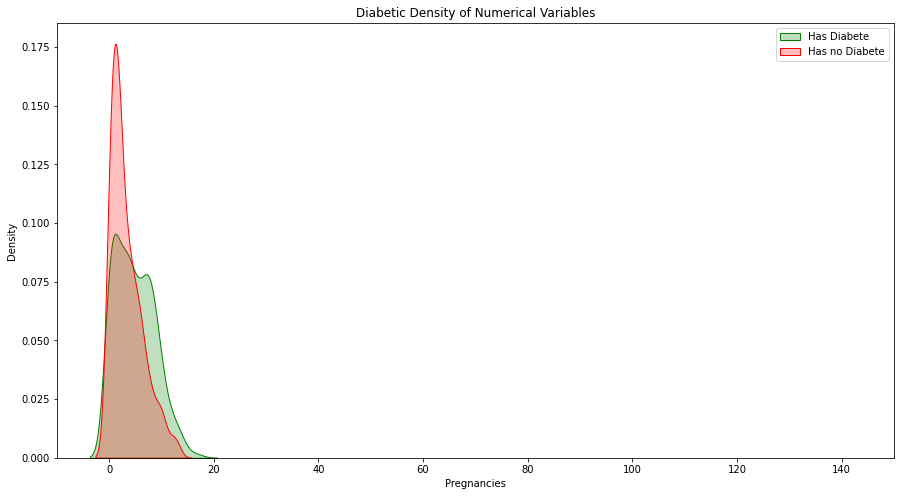

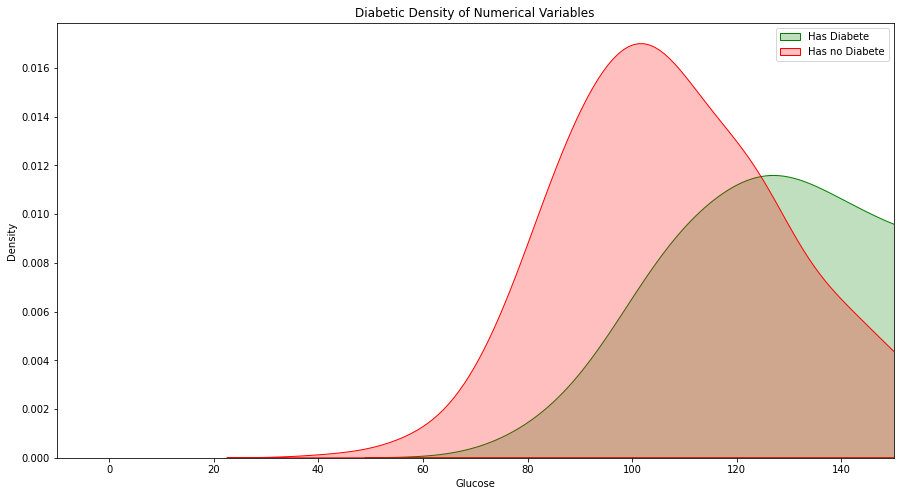

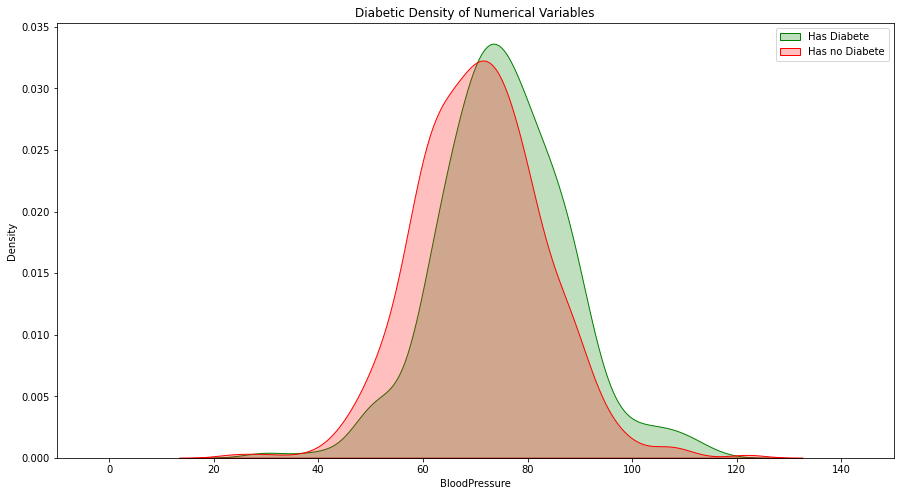

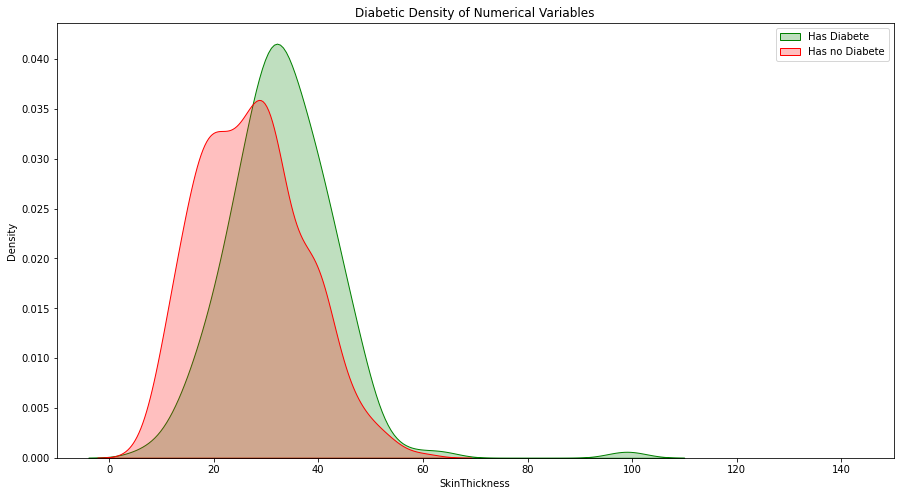

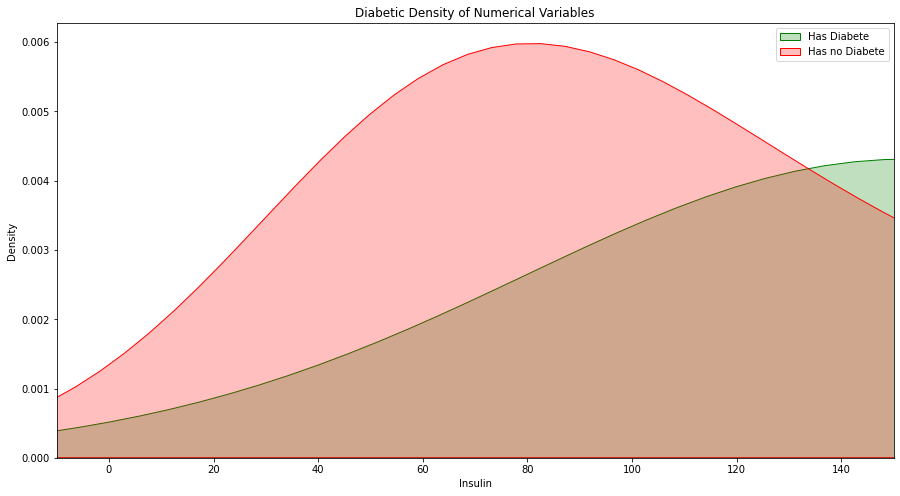

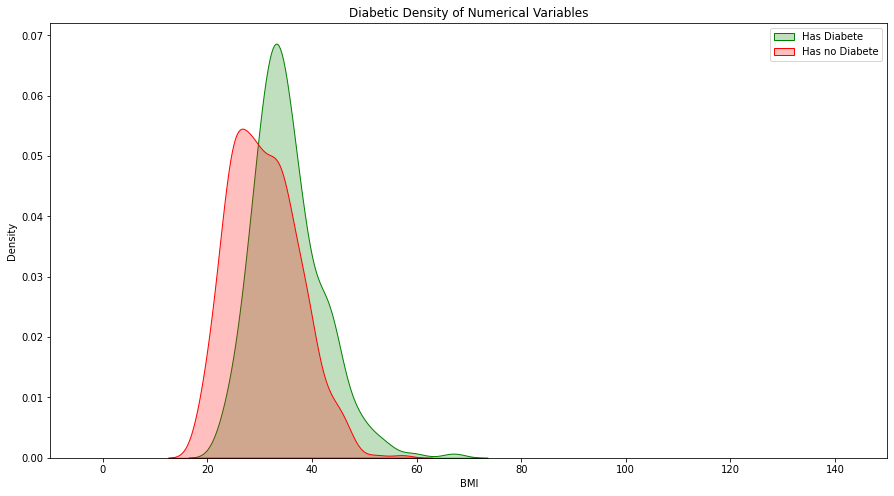

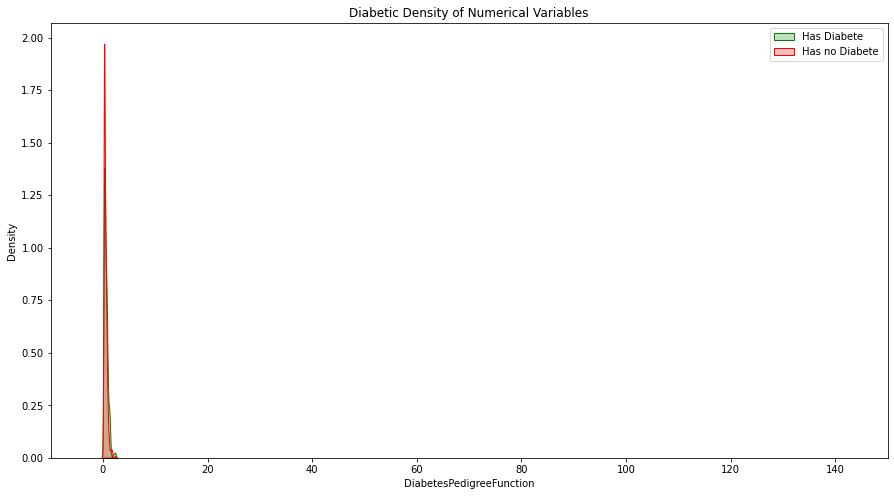

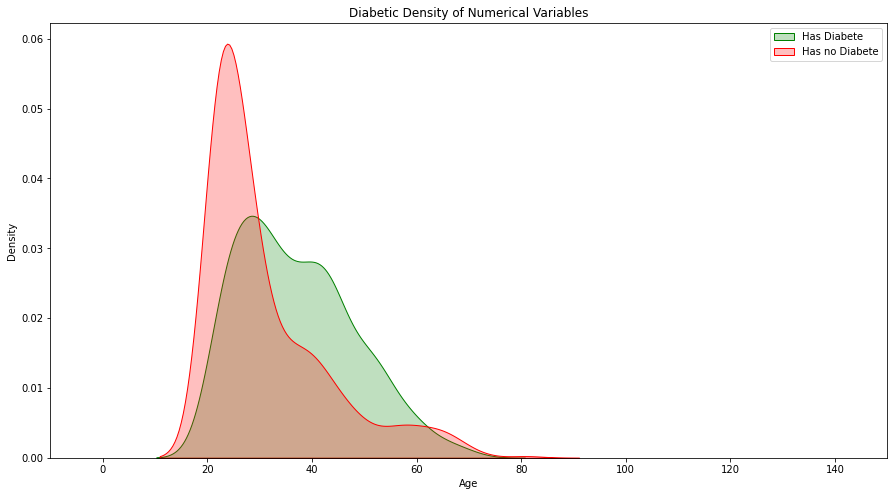

In [ ]:
def target_density_est_with_num(dataframe,target, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.Outcome == 1], color="green", shade=True)
    sns.kdeplot(df[col][df.Outcome == 0], color="red", shade=True)
    plt.legend(['Has Diabete', 'Has no Diabete'])
    plt.xlim(-10,150)
    plt.title("Diabetic Density of Numerical Variables")
    plt.show()

for col in num_cols:
    target_density_est_with_num(df,"Outcome",col)

##### 1.3.4.Outliers Analysis

Define a Function about outlier threshold for data columns


In [ ]:
def outlier_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Define a Function about checking outlier for data columns


In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Define a Function about replace with threshold for data columns


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


##### 1.3.5.The Missing Values Analysis


In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


##### 1.3.6.Correlation Analysis

In [ ]:
dimension_variable = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
corr_matrix = df[dimension_variable].corr()
corr_matrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,1.000000,0.224525,0.216705,0.613915,0.235458
BloodPressure,0.224525,1.000000,0.241438,0.114789,0.294827
SkinThickness,0.216705,0.241438,1.000000,0.200102,0.674511
Insulin,0.613915,0.114789,0.200102,1.000000,0.266070
BMI,0.235458,0.294827,0.674511,0.266070,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


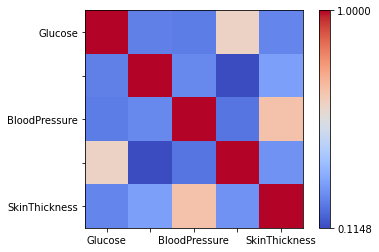

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in dimension_variable:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

##                           2.FEATURE ENGINEERING                                      #


#### **2.1.Processing for Missing Values and Outliers**
<a id="processing_for_missing_values_and_outliers"></a>

In [ ]:
na_cols = missing_values_table(df, True)


               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


Define a Function about comparing target variable with missing values

In [ ]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Outcome", na_cols)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




**Conclusion:**
We examined the missing values of each variable according to the target variable.
So we decided to apply different methods in order to fill na values according to state of each variable.


Fill the missing values of some variables with the median


In [ ]:
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

Fill the missing values of "Insulin" and "SkinThickness variables by implementing the KNN method


In [ ]:
dff = pd.get_dummies(df[["Insulin","SkinThickness"]], drop_first=True)

Standardization of variables


In [ ]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Insulin,SkinThickness
0,NaN,0.56
1,NaN,0.44
2,NaN,NaN
3,0.230797,0.32
4,0.444284,0.56


Implement the KNN method


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Insulin,SkinThickness
0,0.591201,0.560000
1,0.477173,0.440000
2,0.382257,0.441183
3,0.230797,0.320000
4,0.444284,0.560000


Undo the standardization of these variables


In [ ]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
dff.head()

,Insulin,SkinThickness
0,218.925,35.00000
1,179.400,29.00000
2,146.500,29.05915
3,94.000,23.00000
4,168.000,35.00000


In [ ]:
df["Insulin"] = dff["Insulin"]
df["SkinThickness"]= dff["SkinThickness"]

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### **2.2.Creating New Feature Interactions**
<a id="creating_new_feature_interactions"></a>

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,218.925,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,179.400,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.05915,146.500,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.000,43.1,1.200,33.0,1


**Create a Glucose Categorical variable**

In [ ]:
df.loc[(df['Glucose'] < 70), 'GLUCOSE_CAT'] ="hipoglisemi"
df.loc[(df['Glucose'] >= 70) & (df['Glucose'] < 100) , 'GLUCOSE_CAT'] ="normal"
df.loc[(df['Glucose'] >= 100) & (df['Glucose'] < 126) , 'GLUCOSE_CAT'] ="imparied glucose"
df.loc[(df['Glucose'] >= 126), 'GLUCOSE_CAT'] ="hiperglisemi"

In [ ]:
df.groupby("GLUCOSE_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                      mean count
GLUCOSE_CAT                     
hiperglisemi      0.592593   297
hipoglisemi       0.000000    11
imparied glucose  0.279570   279
normal            0.077348   181

> Women with hyperglycemia will have a higher incidence of diabetes on average the "Outcome".

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT
0,6.0,148.0,72.0,35.00000,218.925,33.6,0.627,50.0,1,hiperglisemi
1,1.0,85.0,66.0,29.00000,179.400,26.6,0.351,31.0,0,normal
2,8.0,183.0,64.0,29.05915,146.500,23.3,0.672,32.0,1,hiperglisemi
3,1.0,89.0,66.0,23.00000,94.000,28.1,0.167,21.0,0,normal
4,0.0,137.0,40.0,35.00000,168.000,43.1,1.200,33.0,1,hiperglisemi


**Create the Age Categorical variable**

In [ ]:
df.loc[(df['Age'] >= 18) & (df['Age'] < 30) , 'AGE_CAT'] ="young_women_"
df.loc[(df['Age'] >= 30) & (df['Age'] < 45) , 'AGE_CAT'] ="mature_women"
df.loc[(df['Age'] >= 45) & (df['Age'] < 65) , 'AGE_CAT'] ="middle_age"
df.loc[(df['Age'] >= 65) & (df['Age'] < 75) , 'AGE_CAT'] ="old_age"
df.loc[(df['Age'] >= 75) , 'AGE_CAT'] ="elder_age"

In [ ]:
df.groupby("AGE_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                  mean count
AGE_CAT                     
mature_women  0.493724   239
middle_age    0.529915   117
old_age       0.250000    16
young_women_  0.212121   396

> Middle-age women will have a higher incidence of diabetes on average the "Outcome".

**Create the BMI Categorical variable**

In [ ]:
df.loc[(df['BMI'] < 16), 'BMI_CAT'] ="overweak"
df.loc[(df['BMI'] >= 16) & (df['BMI'] < 18.5) , 'BMI_CAT'] ="weak"
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25) , 'BMI_CAT'] ="normal"
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30) , 'BMI_CAT'] ="overweight"
df.loc[(df['BMI'] >= 30) & (df['BMI'] < 35) , 'BMI_CAT'] ="1st_Obese"
df.loc[(df['BMI'] >= 35) & (df['BMI'] < 45) , 'BMI_CAT'] ="2nd_Obese"
df.loc[(df['BMI'] >= 45), 'BMI_CAT'] ="3rd_Obese"

In [ ]:
df.groupby("BMI_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                mean count
BMI_CAT                   
1st_Obese   0.438298   235
2nd_Obese   0.452830   212
3rd_Obese   0.611111    36
normal      0.068627   102
overweight  0.223464   179
weak        0.000000     4

> Morbidly obese women will have a higher incidence of diabetes on average the "Outcome".

**Create a Diastolic Blood Pressure Categorical variable**


In [ ]:
df.loc[(df['BloodPressure'] < 70)  , 'DIASTOLIC_CAT'] ="low"
df.loc[(df['BloodPressure'] >= 70) & (df['BMI'] < 90) , 'DIASTOLIC_CAT'] ="normal"
df.loc[(df['BloodPressure'] >= 90 ) , 'DIASTOLIC_CAT'] ="high"

In [ ]:
df.groupby("DIASTOLIC_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                   mean count
DIASTOLIC_CAT                
high           0.483333    60
low            0.247350   283
normal         0.397647   425

> Women with high blood pressure will have a higher incidence of diabetes on average the "Outcome".

**Create a Insulin Categorical variable**

In [ ]:
df.loc[(df['Insulin'] < 120)  , 'INSULIN_CAT'] ="normal"
df.loc[(df['Insulin'] >= 120) , 'INSULIN_CAT'] ="abnormal"

In [ ]:
df.groupby("INSULIN_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                 mean count
INSULIN_CAT                
abnormal     0.429112   529
normal       0.171548   239

> Women with abnormal insulin will have a higher incidence of diabetes on average the "Outcome."

**Create a Pregnancies Categorical variable**

In [ ]:
df.loc[(df['Pregnancies'] == 0)  , 'PREG_CAT'] ="unpregnant"
df.loc[(df['Pregnancies'] > 0 ) & (df['Pregnancies'] <= 5)  , 'PREG_CAT'] ="normal"
df.loc[(df['Pregnancies'] > 5 ) & (df['Pregnancies'] <= 10 )  , 'PREG_CAT'] ="high"
df.loc[(df['Pregnancies'] > 10 )  , 'PREG_CAT'] ="very high"

In [ ]:
df.groupby("PREG_CAT").agg({"Outcome": ["mean","count"]})

Outcome      
                mean count
PREG_CAT                  
high        0.491892   185
normal      0.271689   438
unpregnant  0.342342   111
very high   0.588235    34

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT,AGE_CAT,BMI_CAT,DIASTOLIC_CAT,INSULIN_CAT,PREG_CAT
0,6.0,148.0,72.0,35.00000,218.925,33.6,0.627,50.0,1,hiperglisemi,middle_age,1st_Obese,normal,abnormal,high
1,1.0,85.0,66.0,29.00000,179.400,26.6,0.351,31.0,0,normal,mature_women,overweight,low,abnormal,normal
2,8.0,183.0,64.0,29.05915,146.500,23.3,0.672,32.0,1,hiperglisemi,mature_women,normal,low,abnormal,high
3,1.0,89.0,66.0,23.00000,94.000,28.1,0.167,21.0,0,normal,young_women_,overweight,low,normal,normal
4,0.0,137.0,40.0,35.00000,168.000,43.1,1.200,33.0,1,hiperglisemi,mature_women,2nd_Obese,low,abnormal,unpregnant
